<a href="https://colab.research.google.com/github/mayang17/NN-for-computer-vision/blob/main/NN_for_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.2580 - loss: 2.0385 - val_accuracy: 0.3412 - val_loss: 1.8175
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.3723 - loss: 1.7332 - val_accuracy: 0.3919 - val_loss: 1.7081
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.4086 - loss: 1.6391 - val_accuracy: 0.4082 - val_loss: 1.6592
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.4352 - loss: 1.5752 - val_accuracy: 0.4108 - val_loss: 1.6352
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.4432 - loss: 1.5358 - val_accuracy: 0.4458 - val_loss: 1.5540
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.4662 - loss: 1.4922 - val_accuracy: 0.4478 - val_loss: 1.5747
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.4695 - loss: 1.4722 - val_accuracy: 0.4491 - val_loss: 1.5488
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.4881 -

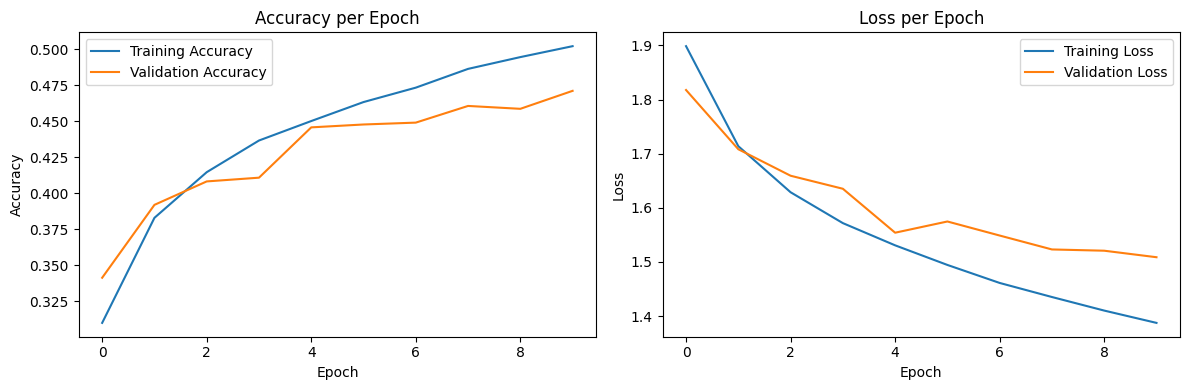

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


<ipython-input-4-8417f80cec42>:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(y_test[i])]}\nPred: {class_names[y_pred[i]]}")


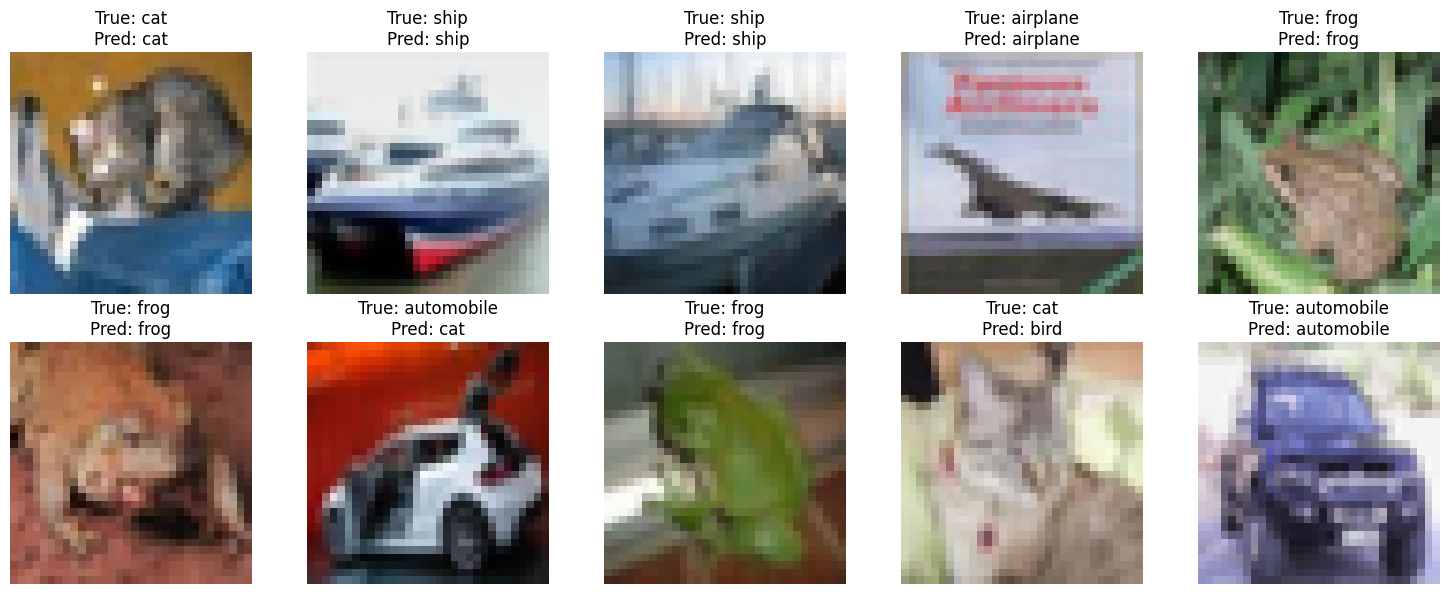

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi nilai piksel dari 0-255 ke 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Membangun model MLP
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluasi pada data uji
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc}")

# Visualisasi Akurasi & Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Menampilkan prediksi dan label pada beberapa gambar
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[int(y_test[i])]}\nPred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ubah label ke one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten gambar 32x32x3 menjadi vektor 3072
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

# Split val
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# Bangun model MLP
model = models.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Training
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.1626 - loss: 3.0260 - val_accuracy: 0.3151 - val_loss: 2.1326
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.2429 - loss: 2.1854 - val_accuracy: 0.2880 - val_loss: 2.0688
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.2567 - loss: 2.0539 - val_accuracy: 0.3121 - val_loss: 1.9854
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.2673 - loss: 2.0198 - val_accuracy: 0.3128 - val_loss: 1.9661
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.2645 - loss: 2.0003 - val_accuracy: 0.3339 - val_loss: 1.9312
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.2745 - loss: 1.9860 - val_accuracy: 0.3200 - val_loss: 1.9626
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.2719 - loss: 1.9820 - val_accuracy: 0.2969 - val_loss: 1.9917
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.2120 - loss: 2.1718 - val_accuracy: 0.3233 - val_loss: 1.8550
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.2944 - loss: 1.9049 - val_accuracy: 0.3545 - val_loss: 1.7973
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3204 - loss: 1.8578 - val_accuracy: 0.3938 - val_loss: 1.7483
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3270 - loss: 1.8348 - val_accuracy: 0.3768 - val_loss: 1.7729
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3421 - loss: 1.8040 - val_accuracy: 0.3902 - val_loss: 1.7272
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3435 - loss: 1.7963 - val_accuracy: 0.3972 - val_loss: 1.7335
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3545 - loss: 1.7824 - val_accuracy: 0.4087 - val_loss: 1.7116
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3515 - loss: 1.7760 - 

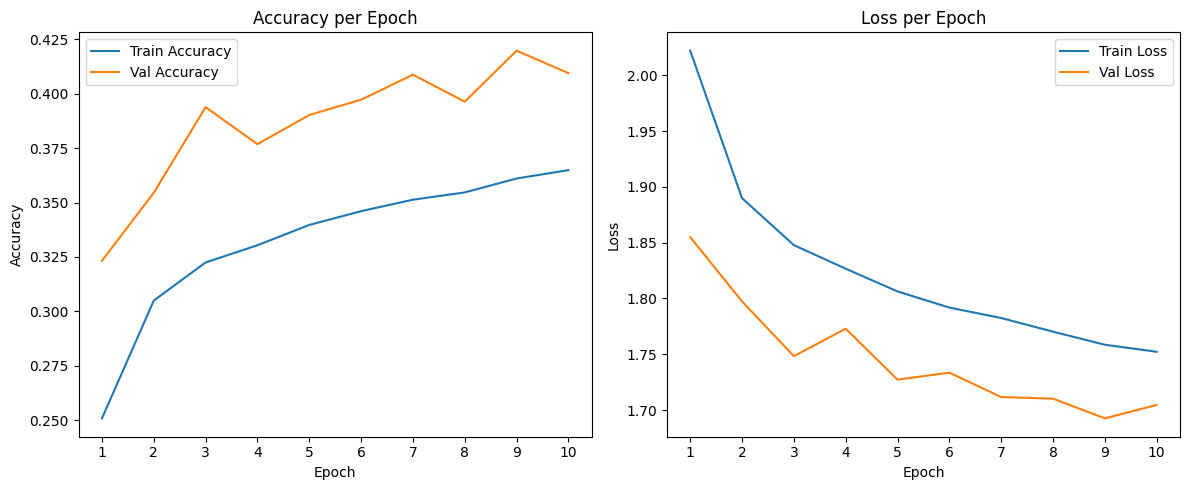

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


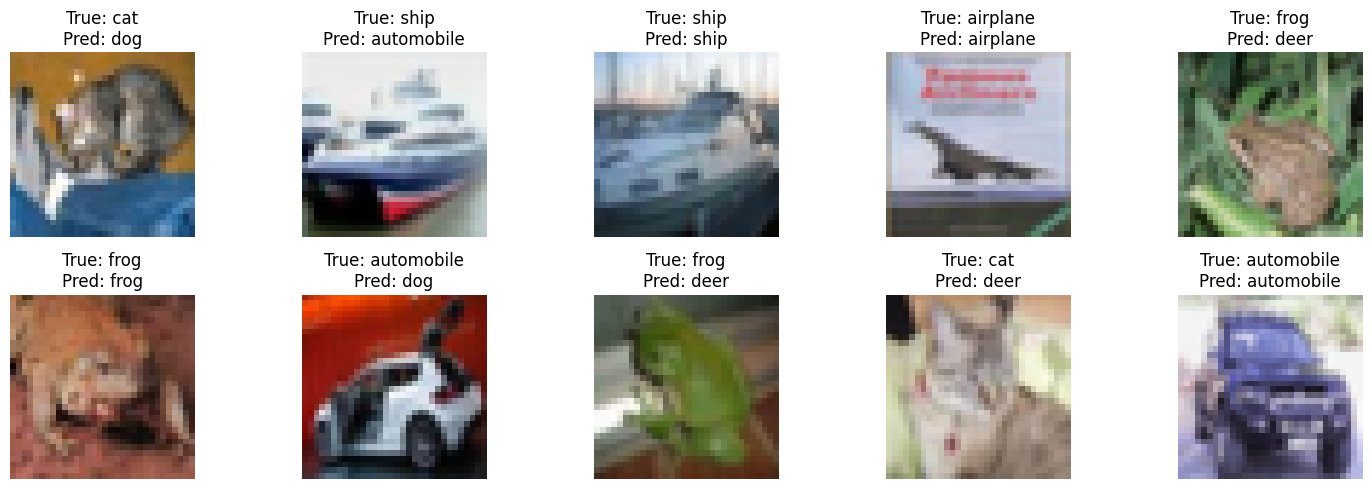

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# 1. Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Normalisasi data (0-255 menjadi 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. One-hot encoding label
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 4. Bangun model Neural Network (tanpa CNN)
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer
])

# 5. Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Training model
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test_cat))

# 7. Plot grafik akurasi dan loss
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Train Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs_range)
plt.legend()

plt.tight_layout()
plt.show()

# 8. Prediksi pada data uji
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# 9. Menampilkan gambar hasil prediksi
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
